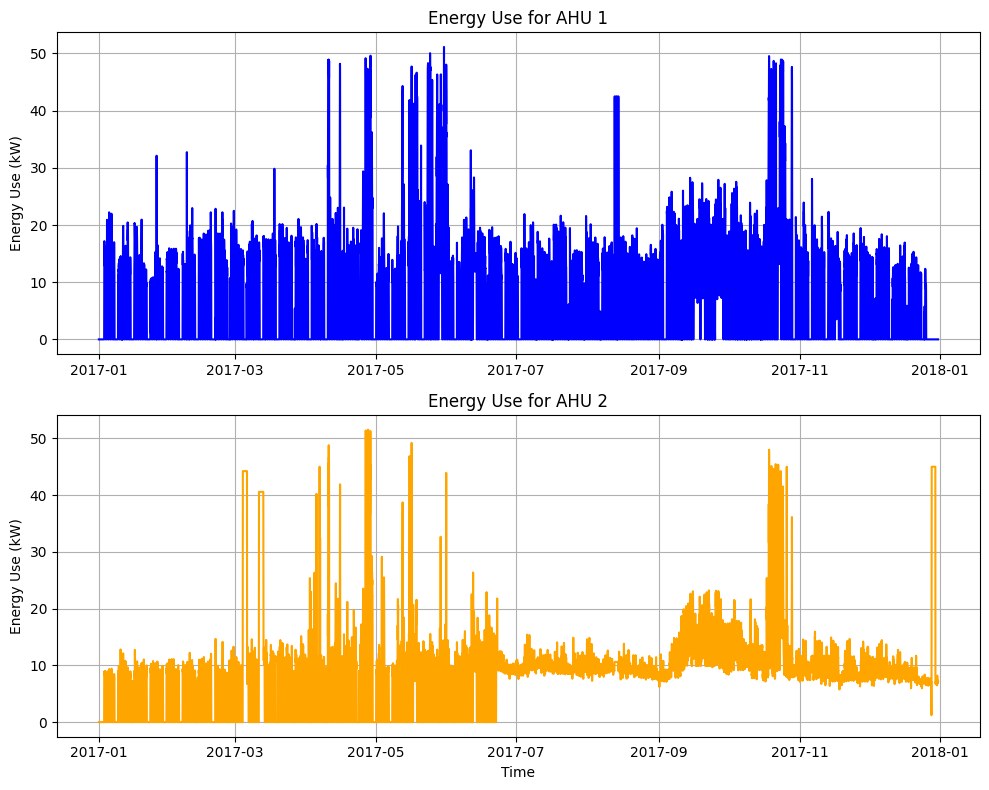

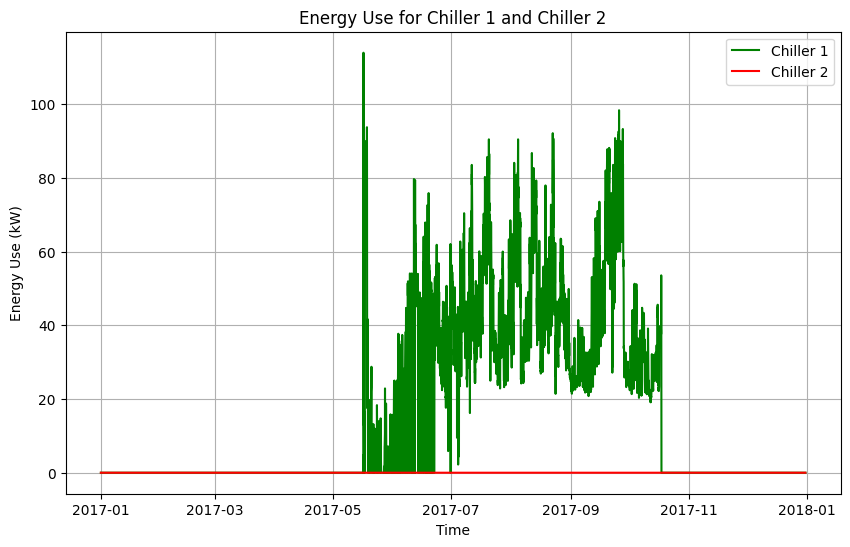

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = "canal energy use.csv"
energy_data = pd.read_csv(file_path)

# Parse the timestamp column and ensure it's in datetime format
energy_data["Timestamp"] = pd.to_datetime(energy_data["Unnamed: 0"])

# Set the Timestamp column as the index
energy_data.set_index("Timestamp", inplace=True)

# Extract relevant columns for AHU and Chiller energy usage
ahu_chiller_data = energy_data[["AHU 1", "AHU 2", "Chiller 1", "Chiller 2"]]

# Figure 1: Subplots for AHU 1 and AHU 2
plt.figure(figsize=(10, 8))

# Subplot for AHU 1
plt.subplot(2, 1, 1)
plt.plot(ahu_chiller_data.index, ahu_chiller_data["AHU 1"], color="blue")
plt.title("Energy Use for AHU 1")
plt.ylabel("Energy Use (kW)")
plt.grid(True)

# Subplot for AHU 2
plt.subplot(2, 1, 2)
plt.plot(ahu_chiller_data.index, ahu_chiller_data["AHU 2"], color="orange")
plt.title("Energy Use for AHU 2")
plt.xlabel("Time")
plt.ylabel("Energy Use (kW)")
plt.grid(True)

# Adjust layout for the first figure
plt.tight_layout()

# Show the first figure
plt.show()

# Figure 2: Plot for Chiller 1 and Chiller 2
plt.figure(figsize=(10, 6))

plt.plot(
    ahu_chiller_data.index,
    ahu_chiller_data["Chiller 1"],
    color="green",
    label="Chiller 1",
)
plt.plot(
    ahu_chiller_data.index,
    ahu_chiller_data["Chiller 2"],
    color="red",
    label="Chiller 2",
)
plt.title("Energy Use for Chiller 1 and Chiller 2")
plt.xlabel("Time")
plt.ylabel("Energy Use (kW)")
plt.legend(loc="upper right")
plt.grid(True)

# Show the second figure
plt.show()


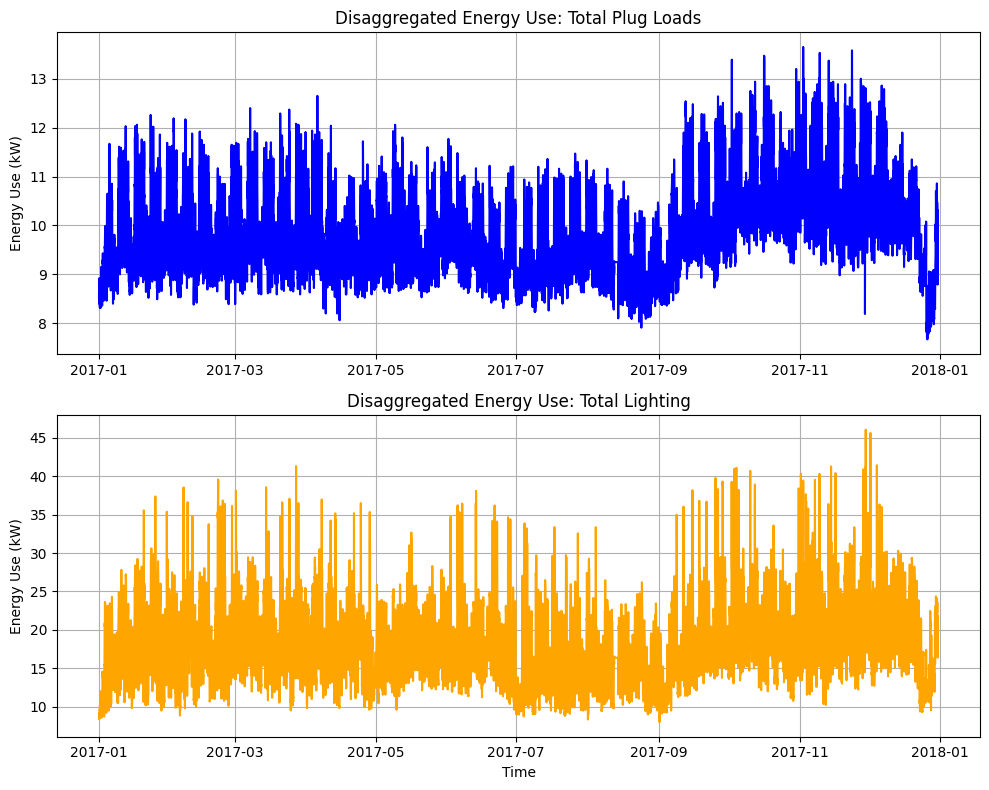

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = "Canal_Clean_Energy_Use.xlsx"
energy_data = pd.read_excel(file_path, sheet_name="Sheet1")

# Convert the Timestamp column to datetime format
energy_data["Timestamp"] = pd.to_datetime(energy_data["Timestamp"])

# Set the Timestamp column as the index
energy_data.set_index("Timestamp", inplace=True)

# Create a figure with subplots for Total Plug Loads and Total Lighting
plt.figure(figsize=(10, 8))

# Subplot 1: Total Plug Loads
plt.subplot(2, 1, 1)
plt.plot(energy_data.index, energy_data["Total Plugs"], color="blue")
plt.title("Disaggregated Energy Use: Total Plug Loads")
plt.ylabel("Energy Use (kW)")
plt.grid(True)

# Subplot 2: Total Lighting
plt.subplot(2, 1, 2)
plt.plot(energy_data.index, energy_data["Total Lighting"], color="orange")
plt.title("Disaggregated Energy Use: Total Lighting")
plt.xlabel("Time")
plt.ylabel("Energy Use (kW)")
plt.grid(True)

# Adjust layout for the figure
plt.tight_layout()

# Show the figure
plt.show()


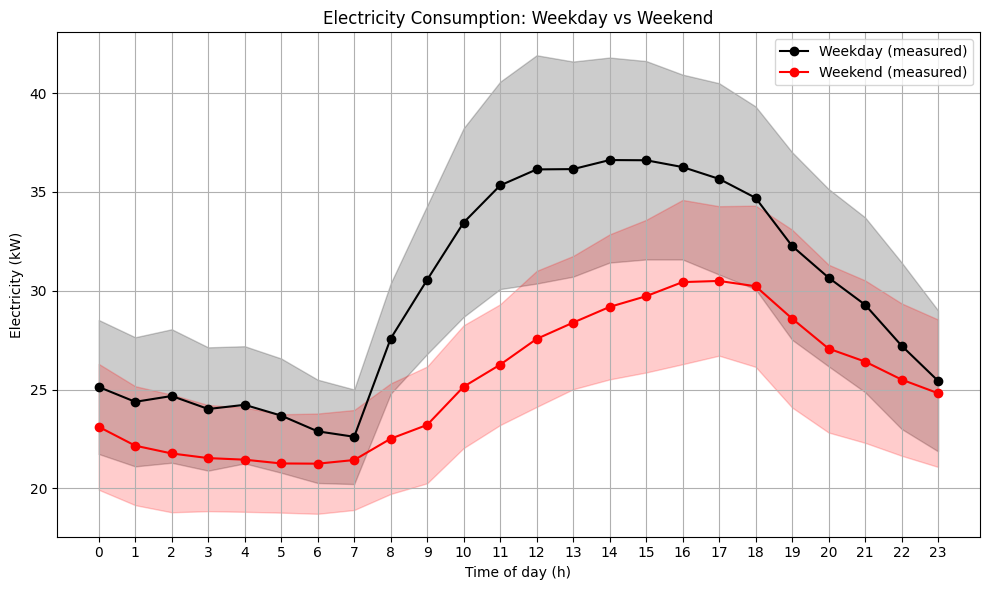

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = "Canal_Clean_Energy_Use.xlsx"
energy_data = pd.read_excel(file_path, sheet_name="Sheet1")

# Convert the Timestamp column to datetime format
energy_data["Timestamp"] = pd.to_datetime(energy_data["Timestamp"])

# Extract hour of day and day of week for grouping
energy_data["Hour"] = energy_data["Timestamp"].dt.hour
energy_data["DayOfWeek"] = energy_data["Timestamp"].dt.dayofweek

# Classify weekdays (0-4) and weekends (5-6)
energy_data["IsWeekend"] = energy_data["DayOfWeek"] >= 5

# Calculate total electricity use (lighting + plugs)
energy_data["Total Electricity"] = (
    energy_data["Total Plugs"] + energy_data["Total Lighting"]
)

# Group by Hour and IsWeekend for aggregation
grouped = energy_data.groupby(["Hour", "IsWeekend"])["Total Electricity"]
mean_consumption = grouped.mean().unstack()
std_consumption = grouped.std().unstack()

# Plot the figure with shaded regions for standard deviation
plt.figure(figsize=(10, 6))

# Weekday: Plot mean with shaded region
plt.plot(
    mean_consumption.index,
    mean_consumption[False],
    "o-",
    label="Weekday (measured)",
    color="black",
)
plt.fill_between(
    mean_consumption.index,
    mean_consumption[False] - std_consumption[False],
    mean_consumption[False] + std_consumption[False],
    color="black",
    alpha=0.2,
)

# Weekend: Plot mean with shaded region
plt.plot(
    mean_consumption.index,
    mean_consumption[True],
    "o-",
    label="Weekend (measured)",
    color="red",
)
plt.fill_between(
    mean_consumption.index,
    mean_consumption[True] - std_consumption[True],
    mean_consumption[True] + std_consumption[True],
    color="red",
    alpha=0.2,
)

# Customize the plot
plt.title("Electricity Consumption: Weekday vs Weekend")
plt.xlabel("Time of day (h)")
plt.ylabel("Electricity (kW)")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.tight_layout()


# Show the plot
plt.show()


The above figure shows the measured electricity consumption for lighting and plug loads across weekdays and weekends. The comparison is broken down by the time of day. 
The shaded region represents one standard deviation above and below the mean for each category.
- The script calculates the mean and standard deviation for electricity usage for each hour, separately for weekdays and weekends.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


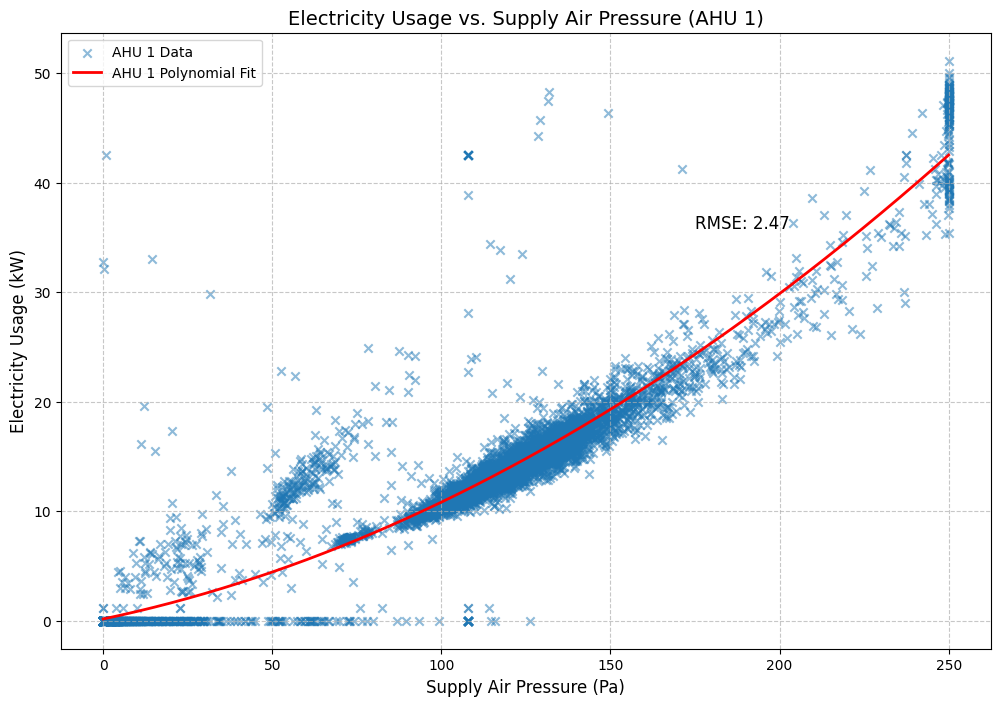

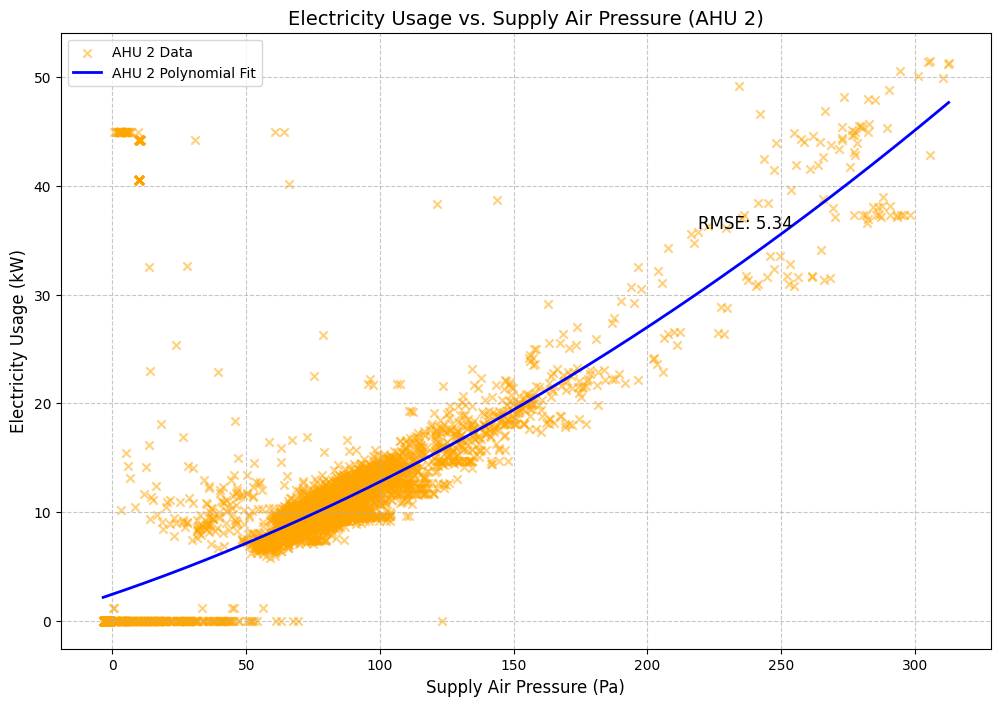

AHU 1 - RMSE: 2.47, R-squared: 0.93
AHU 2 - RMSE: 5.34, R-squared: 0.50


In [59]:
# Re-importing necessary libraries and datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Reload datasets
ahu_1_data_path = "canal ahu 1.csv"
ahu_2_data_path = "canal ahu 2.csv"
energy_data_path = "canal energy use.csv"

ahu_1_data = pd.read_csv(ahu_1_data_path)
ahu_2_data = pd.read_csv(ahu_2_data_path)
energy_data = pd.read_csv(energy_data_path)

# Parse timestamps
ahu_1_data["Timestamp"] = pd.to_datetime(ahu_1_data["Unnamed: 0"], errors="coerce")
ahu_2_data["Timestamp"] = pd.to_datetime(ahu_2_data["Unnamed: 0"], errors="coerce")
energy_data["Timestamp"] = pd.to_datetime(energy_data["Unnamed: 0"], errors="coerce")

# Merge datasets
merged_data_ahu1 = pd.merge(ahu_1_data, energy_data, on="Timestamp", how="inner")
merged_data_ahu2 = pd.merge(ahu_2_data, energy_data, on="Timestamp", how="inner")

# Prepare data for AHU 1
plot_data_ahu1 = merged_data_ahu1[["AHU 1 Supply Air Pressure (Pa)", "AHU 1"]].dropna()
X_ahu1 = plot_data_ahu1[["AHU 1 Supply Air Pressure (Pa)"]].values
y_ahu1 = plot_data_ahu1["AHU 1"].values

# Prepare data for AHU 2
plot_data_ahu2 = merged_data_ahu2[["AHU 2 Supply Air Pressure (Pa)", "AHU 2"]].dropna()
X_ahu2 = plot_data_ahu2[["AHU 2 Supply Air Pressure (Pa)"]].values
y_ahu2 = plot_data_ahu2["AHU 2"].values

# Polynomial regression for AHU 1
poly_ahu1 = PolynomialFeatures(degree=2)
X_poly_ahu1 = poly_ahu1.fit_transform(X_ahu1)
model_ahu1 = LinearRegression()
model_ahu1.fit(X_poly_ahu1, y_ahu1)
rmse_ahu1 = mean_squared_error(y_ahu1, model_ahu1.predict(X_poly_ahu1), squared=False)
r2_ahu1 = r2_score(y_ahu1, model_ahu1.predict(X_poly_ahu1))

# Polynomial regression for AHU 2
poly_ahu2 = PolynomialFeatures(degree=2)
X_poly_ahu2 = poly_ahu2.fit_transform(X_ahu2)
model_ahu2 = LinearRegression()
model_ahu2.fit(X_poly_ahu2, y_ahu2)
rmse_ahu2 = mean_squared_error(y_ahu2, model_ahu2.predict(X_poly_ahu2), squared=False)
r2_ahu2 = r2_score(y_ahu2, model_ahu2.predict(X_poly_ahu2))

# Plotting AHU 1 separately
plt.figure(figsize=(12, 8))
plt.scatter(
    plot_data_ahu1["AHU 1 Supply Air Pressure (Pa)"],
    plot_data_ahu1["AHU 1"],
    alpha=0.5,
    marker="x",
    label="AHU 1 Data",
)
X_range_ahu1 = np.linspace(X_ahu1.min(), X_ahu1.max(), 500).reshape(-1, 1)
plt.plot(
    X_range_ahu1,
    model_ahu1.predict(poly_ahu1.transform(X_range_ahu1)),
    color="red",
    linewidth=2,
    label="AHU 1 Polynomial Fit",
)
plt.title("Electricity Usage vs. Supply Air Pressure (AHU 1)", fontsize=14)
plt.xlabel("Supply Air Pressure (Pa)", fontsize=12)
plt.ylabel("Electricity Usage (kW)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()

# Add RMSE to the plot
plt.text(
    0.7 * max(X_ahu1),
    0.7 * max(y_ahu1),
    f"RMSE: {rmse_ahu1:.2f}",
    fontsize=12,
    color="black",
)
plt.show()

# Plotting AHU 2 separately
plt.figure(figsize=(12, 8))
plt.scatter(
    plot_data_ahu2["AHU 2 Supply Air Pressure (Pa)"],
    plot_data_ahu2["AHU 2"],
    alpha=0.5,
    marker="x",
    color="orange",
    label="AHU 2 Data",
)
X_range_ahu2 = np.linspace(X_ahu2.min(), X_ahu2.max(), 500).reshape(-1, 1)
plt.plot(
    X_range_ahu2,
    model_ahu2.predict(poly_ahu2.transform(X_range_ahu2)),
    color="blue",
    linewidth=2,
    label="AHU 2 Polynomial Fit",
)
plt.title("Electricity Usage vs. Supply Air Pressure (AHU 2)", fontsize=14)
plt.xlabel("Supply Air Pressure (Pa)", fontsize=12)
plt.ylabel("Electricity Usage (kW)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()

# Add RMSE to the plot
plt.text(
    0.7 * max(X_ahu2),
    0.7 * max(y_ahu2),
    f"RMSE: {rmse_ahu2:.2f}",
    fontsize=12,
    color="black",
)
plt.show()

# Display evaluation results
print(f"AHU 1 - RMSE: {rmse_ahu1:.2f}, R-squared: {r2_ahu1:.2f}")
print(f"AHU 2 - RMSE: {rmse_ahu2:.2f}, R-squared: {r2_ahu2:.2f}")


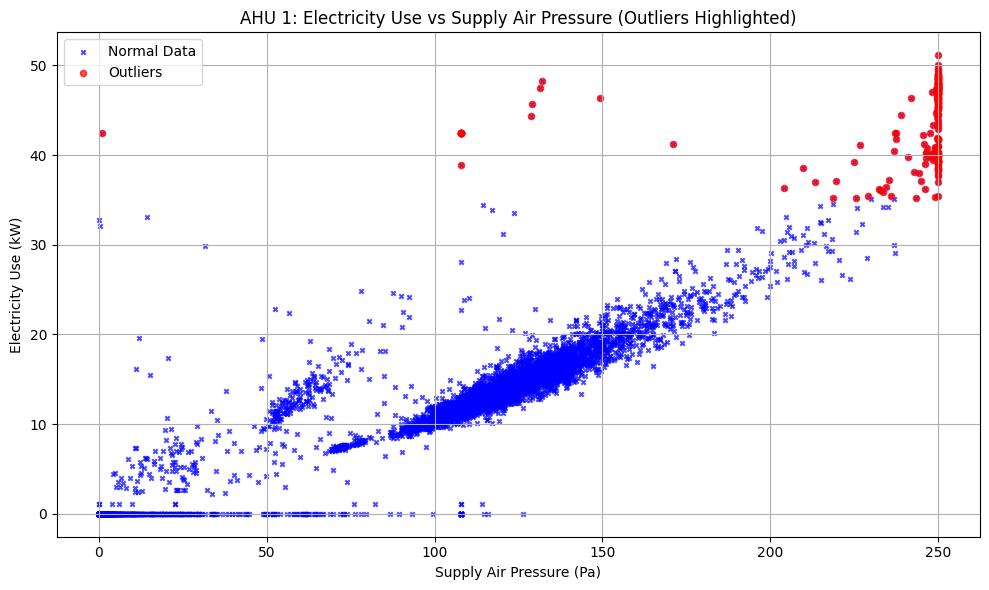

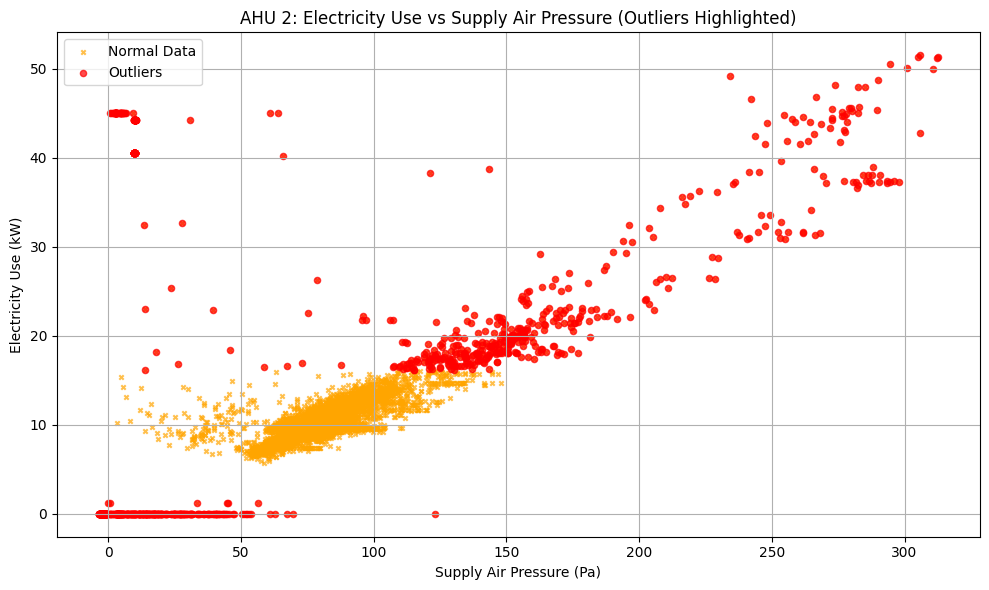

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the datasets
ahu1_file_path = "canal ahu 1.csv"
ahu2_file_path = "canal ahu 2.csv"
energy_file_path = "canal energy use.csv"

# Read the datasets
ahu1_data = pd.read_csv(ahu1_file_path)
ahu2_data = pd.read_csv(ahu2_file_path)
energy_data = pd.read_csv(energy_file_path)

# Convert the Timestamp columns to datetime
ahu1_data["Timestamp"] = pd.to_datetime(ahu1_data["Unnamed: 0"])
ahu2_data["Timestamp"] = pd.to_datetime(ahu2_data["Unnamed: 0"])
energy_data["Timestamp"] = pd.to_datetime(energy_data["Unnamed: 0"])

# Merge AHU 1 and AHU 2 data with energy data on Timestamp
ahu1_merged = pd.merge(
    ahu1_data[["Timestamp", "AHU 1 Supply Air Pressure (Pa)"]],
    energy_data[["Timestamp", "AHU 1"]],
    on="Timestamp",
)
ahu2_merged = pd.merge(
    ahu2_data[["Timestamp", "AHU 2 Supply Air Pressure (Pa)"]],
    energy_data[["Timestamp", "AHU 2"]],
    on="Timestamp",
)


# Function to identify outliers using IQR
def identify_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]


# Identify outliers for AHU 1
ahu1_outliers = identify_outliers(ahu1_merged, "AHU 1")
ahu2_outliers = identify_outliers(ahu2_merged, "AHU 2")

# Plot for AHU 1
plt.figure(figsize=(10, 6))
plt.scatter(
    ahu1_merged["AHU 1 Supply Air Pressure (Pa)"],
    ahu1_merged["AHU 1"],
    label="Normal Data",
    color="blue",
    alpha=0.7,
    marker="x",
    s=10,
)
plt.scatter(
    ahu1_outliers["AHU 1 Supply Air Pressure (Pa)"],
    ahu1_outliers["AHU 1"],
    label="Outliers",
    color="red",
    alpha=0.7,
    marker="o",
    s=20,
)
plt.title("AHU 1: Electricity Use vs Supply Air Pressure (Outliers Highlighted)")
plt.xlabel("Supply Air Pressure (Pa)")
plt.ylabel("Electricity Use (kW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot for AHU 2
plt.figure(figsize=(10, 6))
plt.scatter(
    ahu2_merged["AHU 2 Supply Air Pressure (Pa)"],
    ahu2_merged["AHU 2"],
    label="Normal Data",
    color="orange",
    alpha=0.7,
    marker="x",
    s=10,
)
plt.scatter(
    ahu2_outliers["AHU 2 Supply Air Pressure (Pa)"],
    ahu2_outliers["AHU 2"],
    label="Outliers",
    color="red",
    alpha=0.7,
    marker="o",
    s=20,
)
plt.title("AHU 2: Electricity Use vs Supply Air Pressure (Outliers Highlighted)")
plt.xlabel("Supply Air Pressure (Pa)")
plt.ylabel("Electricity Use (kW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


The function identify_outliers uses the interquartile range (IQR) method to determine outliers.
 <br>
Points outside  Q 1 − 1.5 × IQR Q1−1.5×IQR and  Q 3 + 1.5 × IQR Q3+1.5×IQR are marked as outliers.

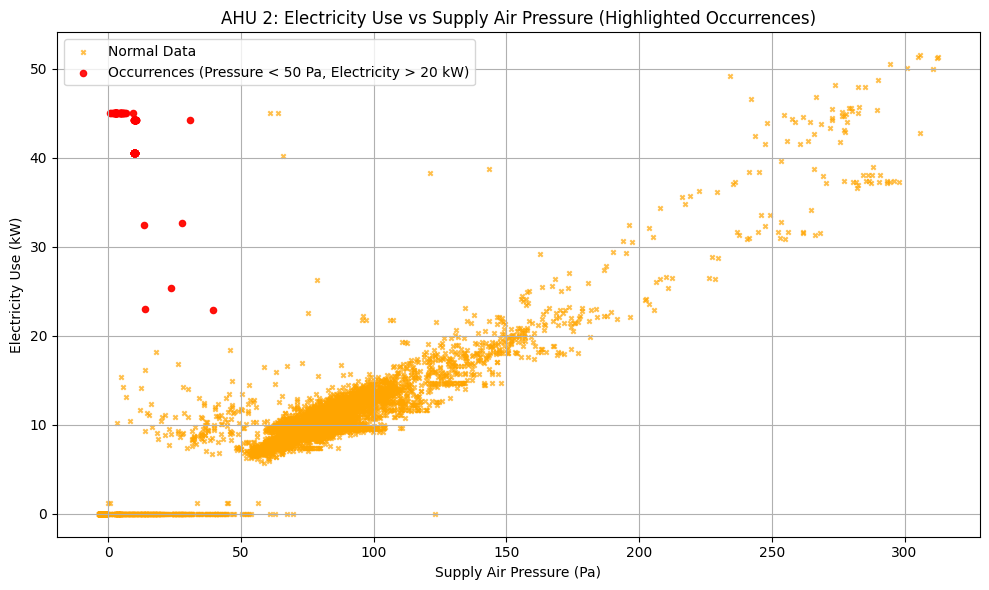

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the datasets
ahu2_file_path = "canal ahu 2.csv"
energy_file_path = "canal energy use.csv"

# Read the datasets
ahu2_data = pd.read_csv(ahu2_file_path)
energy_data = pd.read_csv(energy_file_path)

# Convert the Timestamp columns to datetime
ahu2_data["Timestamp"] = pd.to_datetime(ahu2_data["Unnamed: 0"])
energy_data["Timestamp"] = pd.to_datetime(energy_data["Unnamed: 0"])

# Merge AHU 2 data with energy data on Timestamp
ahu2_merged = pd.merge(
    ahu2_data[["Timestamp", "AHU 2 Supply Air Pressure (Pa)"]],
    energy_data[["Timestamp", "AHU 2"]],
    on="Timestamp",
)

# Identify timestamps where Supply Air Pressure < 50 Pa and Electricity Use > 20 kW
condition = (ahu2_merged["AHU 2 Supply Air Pressure (Pa)"] < 50) & (
    ahu2_merged["AHU 2"] > 20
)
ahu2_specific_conditions = ahu2_merged[condition]

# Generate a figure to highlight these occurrences
plt.figure(figsize=(10, 6))

# Plot all data points
plt.scatter(
    ahu2_merged["AHU 2 Supply Air Pressure (Pa)"],
    ahu2_merged["AHU 2"],
    label="Normal Data",
    color="orange",
    alpha=0.7,
    marker="x",
    s=10,
)

# Highlight the specific conditions
plt.scatter(
    ahu2_specific_conditions["AHU 2 Supply Air Pressure (Pa)"],
    ahu2_specific_conditions["AHU 2"],
    label="Occurrences (Pressure < 50 Pa, Electricity > 20 kW)",
    color="red",
    alpha=0.9,
    marker="o",
    s=20,
)

# Customize the plot
plt.title("AHU 2: Electricity Use vs Supply Air Pressure (Highlighted Occurrences)")
plt.xlabel("Supply Air Pressure (Pa)")
plt.ylabel("Electricity Use (kW)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/81/d7b2wy_s479cq821lnbp_4t80000gn/T/ipykernel_87898/1163005908.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ahu2_specific_conditions['Date'] = ahu2_specific_conditions['Timestamp'].dt.date


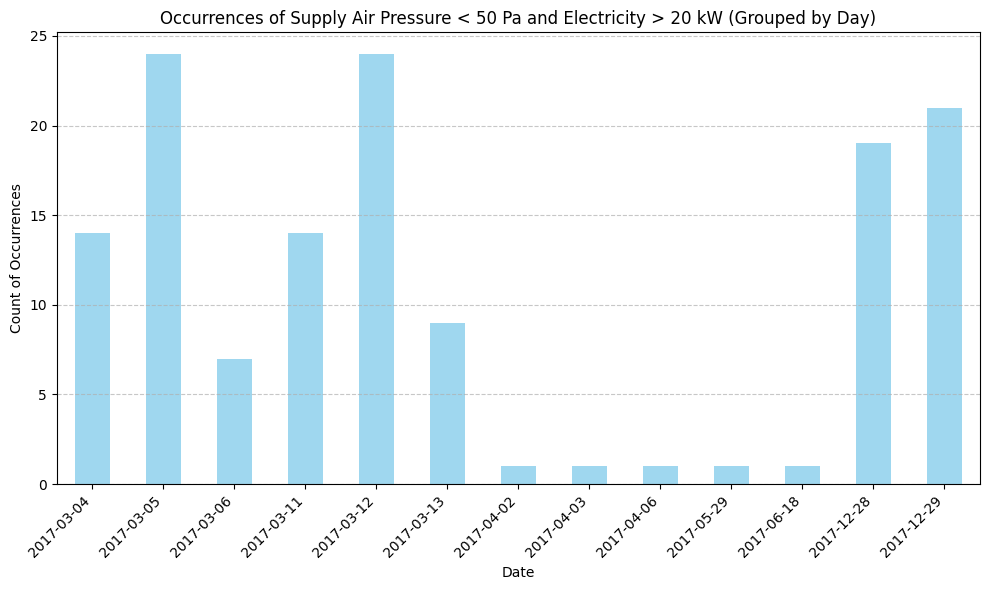

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the datasets
ahu2_file_path = "canal ahu 2.csv"
energy_file_path = "canal energy use.csv"
# Read the datasets
ahu2_data = pd.read_csv(ahu2_file_path)
energy_data = pd.read_csv(energy_file_path)

# Convert the Timestamp columns to datetime
ahu2_data["Timestamp"] = pd.to_datetime(ahu2_data["Unnamed: 0"])
energy_data["Timestamp"] = pd.to_datetime(energy_data["Unnamed: 0"])

# Merge AHU 2 data with energy data on Timestamp
ahu2_merged = pd.merge(
    ahu2_data[["Timestamp", "AHU 2 Supply Air Pressure (Pa)"]],
    energy_data[["Timestamp", "AHU 2"]],
    on="Timestamp",
)

# Identify timestamps where Supply Air Pressure < 50 Pa and Electricity Use > 20 kW
condition = (ahu2_merged["AHU 2 Supply Air Pressure (Pa)"] < 50) & (
    ahu2_merged["AHU 2"] > 20
)
ahu2_specific_conditions = ahu2_merged[condition]

# Add a Date column and count occurrences per day
ahu2_specific_conditions["Date"] = ahu2_specific_conditions["Timestamp"].dt.date
ahu2_daily_counts = ahu2_specific_conditions["Date"].value_counts().sort_index()

# Plot a bar chart
plt.figure(figsize=(10, 6))
ahu2_daily_counts.plot(kind="bar", color="skyblue", alpha=0.8)
plt.title(
    "Occurrences of Supply Air Pressure < 50 Pa and Electricity > 20 kW (Grouped by Day)"
)
plt.xlabel("Date")
plt.ylabel("Count of Occurrences")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the bar chart
plt.show()


/var/folders/81/d7b2wy_s479cq821lnbp_4t80000gn/T/ipykernel_87898/3089726613.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ahu2_specific_conditions["Date"] = ahu2_specific_conditions["Timestamp"].dt.date
/var/folders/81/d7b2wy_s479cq821lnbp_4t80000gn/T/ipykernel_87898/3089726613.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ahu2_specific_conditions["Hour"] = ahu2_specific_conditions["Timestamp"].dt.hour


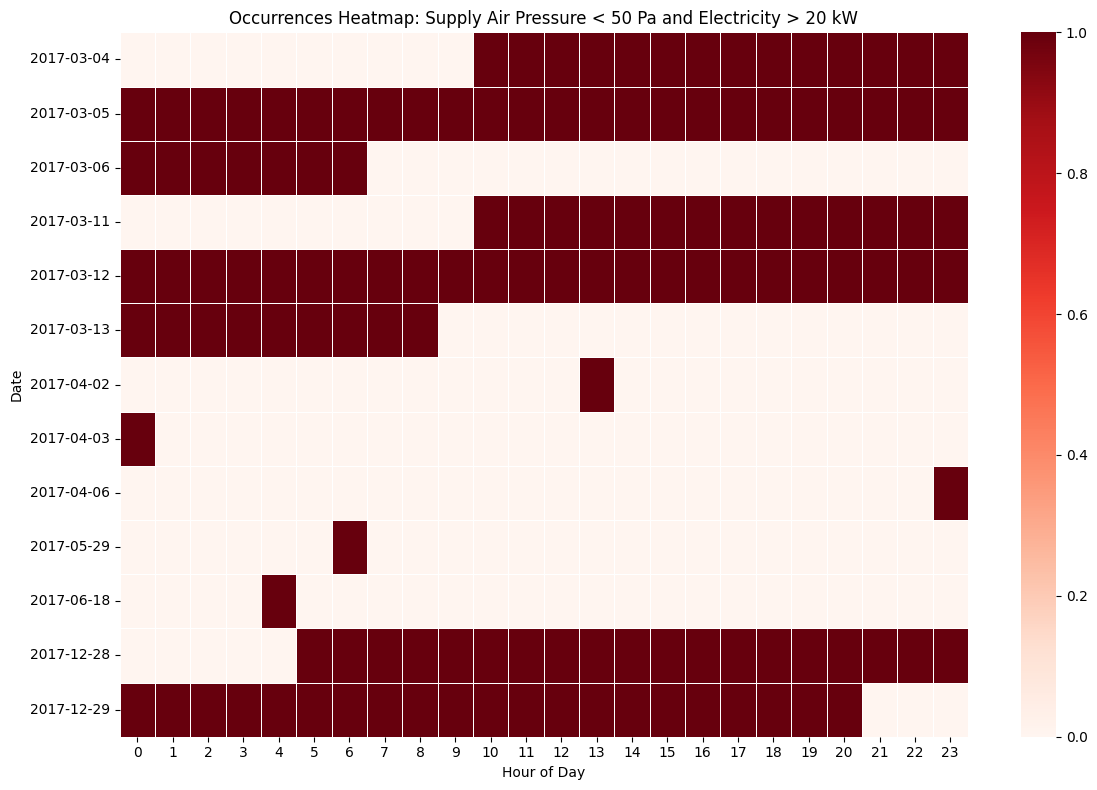

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the datasets
ahu2_file_path = "canal ahu 2.csv"
energy_file_path = "canal energy use.csv"

# Read the datasets
ahu2_data = pd.read_csv(ahu2_file_path)
energy_data = pd.read_csv(energy_file_path)

# Convert the Timestamp columns to datetime
ahu2_data["Timestamp"] = pd.to_datetime(ahu2_data["Unnamed: 0"])
energy_data["Timestamp"] = pd.to_datetime(energy_data["Unnamed: 0"])

# Merge AHU 2 data with energy data on Timestamp
ahu2_merged = pd.merge(
    ahu2_data[["Timestamp", "AHU 2 Supply Air Pressure (Pa)"]],
    energy_data[["Timestamp", "AHU 2"]],
    on="Timestamp",
)

# Identify timestamps where Supply Air Pressure < 50 Pa and Electricity Use > 20 kW
condition = (ahu2_merged["AHU 2 Supply Air Pressure (Pa)"] < 50) & (
    ahu2_merged["AHU 2"] > 20
)
ahu2_specific_conditions = ahu2_merged[condition]

# Extract date and hour
ahu2_specific_conditions["Date"] = ahu2_specific_conditions["Timestamp"].dt.date
ahu2_specific_conditions["Hour"] = ahu2_specific_conditions["Timestamp"].dt.hour

# Create a pivot table for the heatmap
heatmap_data = ahu2_specific_conditions.pivot_table(
    index="Date", columns="Hour", values="AHU 2", aggfunc="count", fill_value=0
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="Reds", annot=False, fmt="d", linewidths=0.5)
plt.title("Occurrences Heatmap: Supply Air Pressure < 50 Pa and Electricity > 20 kW")
plt.xlabel("Hour of Day")
plt.ylabel("Date")
plt.tight_layout()

# Show the heatmap
plt.show()
